<a href="https://colab.research.google.com/github/bootstrap666/IIR_quantized/blob/main/Projeto_filtro_IIR_quantizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams
from scipy import signal

In [2]:
#
# Copyright (c) 2011 Christopher Felton
#
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU Lesser General Public License for more details.
#
# You should have received a copy of the GNU Lesser General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.
#

# The following is derived from the slides presented by
# Alexander Kain for CS506/606 "Special Topics: Speech Signal Processing"
# CSLU / OHSU, Spring Term 2011.
def zplane(b,a):

    # get a figure/plot
    ax = plt.subplot(111)

    # create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)

    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1

    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)

    # Plot the zeros and set marker properties
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
              markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)

    plt.show()

    return z, p, k

In [3]:
# Parâmetros do filtro passa-baixa
# fp - frequência superior da banda de passagem
# fr - frequência inferior da banda de rejeição
# alphap - ripple admissível na banda de passagem
# alphar - ripple admissível na banda de rejeição
# Nbits - quantidade de bits utilizados em uma representação de ponto-fixo

fp = 4000
fr = 5000
fs = 44100

alphap = 0.1
alphar = 60

T = 1.0/fs

Nbits = 20

In [4]:
# Frequências normalizadas
omegap = 2*np.pi*fp/fs
omegar = 2*np.pi*fr/fs

8
25835.82392211124


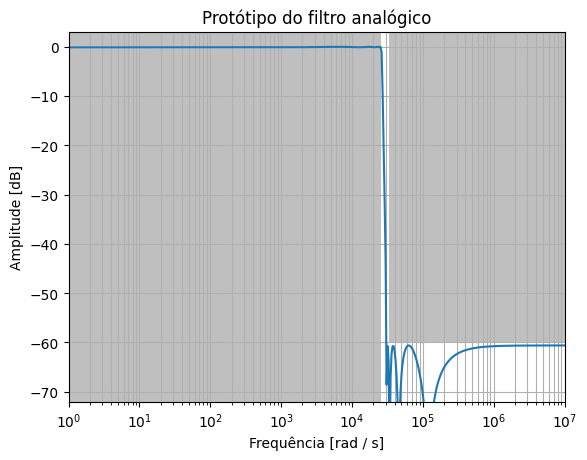

In [5]:
# Pre-warping das frequências e projeto do filtro analógico

omega1 = (2.0/T) *np.tan(np.pi*fp/fs)
omega2 = (2.0/T) *np.tan(np.pi*fr/fs)

N, Wn = signal.ellipord(omega1, omega2, 0.95*alphap, 1.01*alphar, analog=True)
print (N)
print (Wn)

banalog,aanalog = signal.ellip(N, 0.95*alphap, 1.01*alphar, Wn , btype='low', analog=True, output='ba')

w, h = signal.freqs(banalog, aanalog, np.logspace(0, np.ceil(np.log10(2.0*np.pi*fs/2))+1, 500))
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Protótipo do filtro analógico')
plt.xlabel('Frequência [rad / s]')
plt.ylabel('Amplitude [dB]')
plt.grid(which='both', axis='both')
plt.fill([0, 0, omega1, omega1], [99,  alphap,  alphap, 99], '0.75', lw=0) # pass
plt.fill([0, 0, omega1, omega1], [-99,  -alphap,  -alphap, -99], '0.75', lw=0) # pass
plt.fill([omega2, 10**(np.ceil(np.log10(2.0*np.pi*fs/2))+1),  10**(np.ceil(np.log10(2.0*np.pi*fs/2))+1),  omega2], [1e4, 1e4, -alphar, -alphar], '0.75', lw=0) # stop
plt.axis([1, 10**(np.ceil(np.log10(2.0*np.pi*fs/2))+1), -1.2*alphar, 3])
plt.show()

<ipython-input-6-7dc844ec093a>:14: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.axis([0, np.pi, -1.2*alphar, 3])


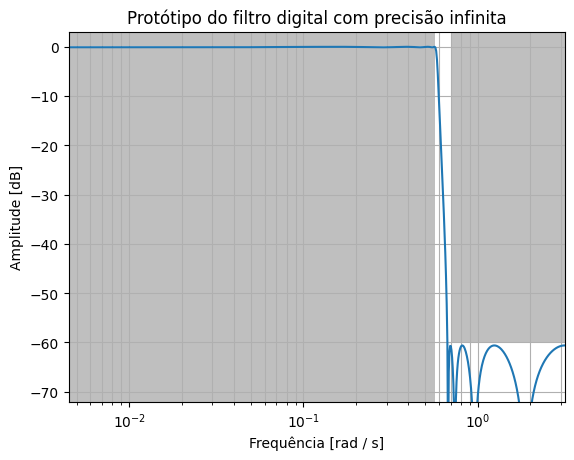

In [6]:
# Obtenção do filtro digital equivalente por meio da transformação bilinear
b,a = signal.bilinear(banalog,aanalog,1/T)

w, h = signal.freqz(b, a)

plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Protótipo do filtro digital com precisão infinita')
plt.xlabel('Frequência [rad / s]')
plt.ylabel('Amplitude [dB]')
plt.grid(which='both', axis='both')
plt.fill([0, 0, omegap, omegap], [99,  alphap,  alphap, 99], '0.75', lw=0) # pass
plt.fill([0, 0, omegap, omegap], [-99,  -alphap,  -alphap, -99], '0.75', lw=0) # pass
plt.fill([omegar, np.pi,  np.pi,  omegar], [1e4, 1e4, -alphar, -alphar], '0.75', lw=0) # stop
plt.axis([0, np.pi, -1.2*alphar, 3])
plt.show()

<ipython-input-7-5fc2042b24d5>:12: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.axis([0, 1.1*omegap, -1.2*alphap, 1.2*alphap])


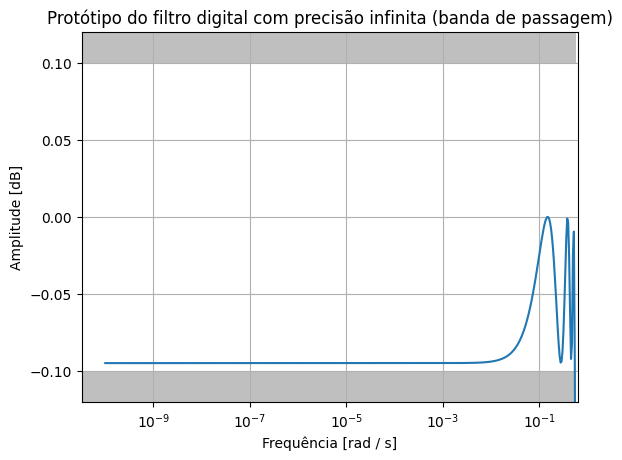

In [7]:
# Gerando um gráfico da resposta em frequência na banda de passagem + 10%
w, h = signal.freqz(b, a, np.logspace(-10, np.log10(1.1*omegap), 500))


plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Protótipo do filtro digital com precisão infinita (banda de passagem)')
plt.xlabel('Frequência [rad / s]')
plt.ylabel('Amplitude [dB]')
plt.grid(which='both', axis='both')
plt.fill([0, 0, omegap, omegap], [99,  alphap,  alphap, 99], '0.75', lw=0) # pass
plt.fill([0, 0, omegap, omegap], [-99,  -alphap,  -alphap, -99], '0.75', lw=0) # pass
plt.axis([0, 1.1*omegap, -1.2*alphap, 1.2*alphap])
plt.show()

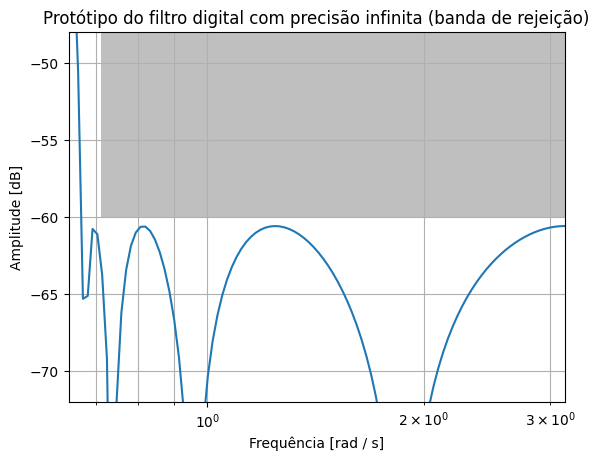

In [8]:
# Gerando um gráfico da resposta em frequência na banda de rejeição
w, h = signal.freqz(b, a, np.logspace(np.log10(0.9*omegar),np.pi, 500))


plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Protótipo do filtro digital com precisão infinita (banda de rejeição)')
plt.xlabel('Frequência [rad / s]')
plt.ylabel('Amplitude [dB]')
plt.grid(which='both', axis='both')
plt.fill([omegar, np.pi,  np.pi,  omegar], [1e4, 1e4, -alphar, -alphar], '0.75', lw=0) # stop
plt.axis([0.9*omegar, np.pi, -1.2*alphar, -0.8*alphar])
plt.show()

(0.0, 3.141592653589793, -80.0, 6.0)

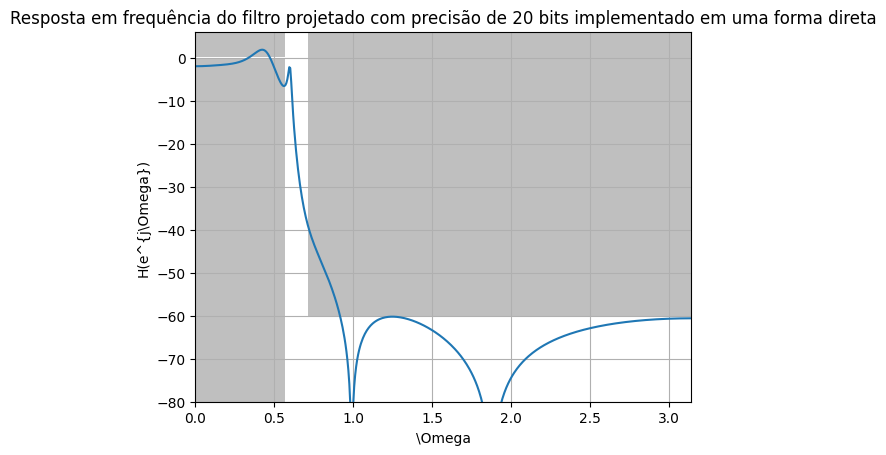

In [9]:
# Convertendo os coeficientes para aritmética de ponto fixo, supondo que o filtro será realizado em uma forma direta ou transposta
ab = np.concatenate((b,a))

maxabsvalue = abs(ab[(ab.real**2 + ab.imag**2).argmax()])

Nbitsinteiro = np.ceil(np.log2(maxabsvalue))

# O numero de bits para a parte fracionária é o número total de bits menos um (sinal) menos o número de bits da parte real
Nbitsfrac = Nbits-1-Nbitsinteiro

q = 2**(-Nbitsfrac)

bquantizado = q * np.round(b/q)
aquantizado = q * np.round(a/q)

Omega, Hquantizado = signal.freqz(bquantizado,aquantizado)

plt.title('Resposta em frequência do filtro projetado com precisão de ' + str(Nbits) + ' bits implementado em uma forma direta')
plt.xlabel('\Omega')
plt.ylabel('H(e^{j\Omega})')
plt.grid(which='both', axis='both')
plt.plot(Omega,20*np.log10(abs(Hquantizado)))

plt.fill([0, omegap,  omegap,  0], [-alphap, -alphap, -600, -600], '0.75', lw=0)
plt.fill([0, omegap,  omegap,  0], [alphap, alphap, 600, 600], '0.75', lw=0)
plt.fill([omegar, omegar, np.pi, np.pi], [99,  -alphar,  -alphar, 99], '0.75', lw=0)
plt.axis([0, np.pi, -80, 6])

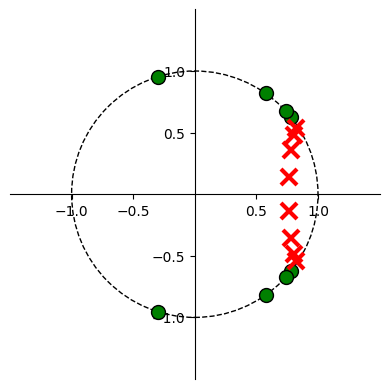

In [10]:
# Comparando a localização dos pólos do filtro no filtro com precisão infinita ...
zplane(b,a)

pol = np.roots(a)
zer = np.roots(b)

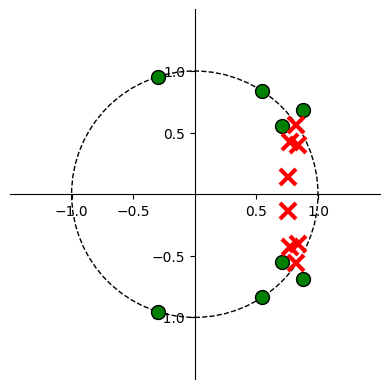

(array([-0.30031154+0.95384117j, -0.30031154-0.95384117j,
         0.54820468+0.8363442j ,  0.54820468-0.8363442j ,
         0.87689505+0.68458343j,  0.87689505-0.68458343j,
         0.70854514+0.5531543j ,  0.70854514-0.5531543j ]),
 array([0.81756921+0.55959787j, 0.81756921-0.55959787j,
        0.83735038+0.40045923j, 0.83735038-0.40045923j,
        0.76924414+0.42678338j, 0.76924414-0.42678338j,
        0.75381479+0.13970899j, 0.75381479-0.13970899j]),
 0.02913892208753059)

In [11]:
#... e no filtro implementado na forma direta quantizado
zplane(bquantizado,aquantizado)

1.3646639342655735


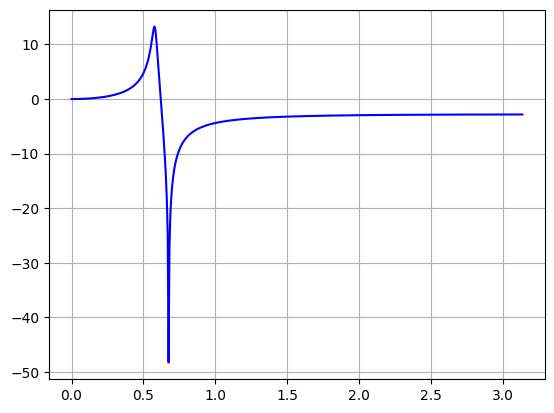

In [12]:
# seleciona em p4 os pólos mais próximos à circunferência de raio unitário, remove os pólos e zeros selecionados
p4 = pol[np.where(abs(pol) == max(abs(pol)))]
pol  = np.delete(pol, np.where(abs(pol) == max(abs(pol))))

# seleciona em z4 os zeros mais próximos a p4[0] e p4[1]
c = (np.sqrt((zer.real - p4[0].real)**2 + (zer.imag - p4[0].imag)**2)).argmin()
d = (np.sqrt((zer.real - p4[1].real)**2 + (zer.imag - p4[1].imag)**2)).argmin()

z4= np.array([zer[c], zer[d]])
zer  = np.delete(zer, [c, d])

b4t, a4 = signal.zpk2tf(z4,p4,1)

# Estimativa da energia da resposta ao impulso
#model = signal.dlti(b4t,a4)
#n, h = signal.dimpulse(model, n=50000)
# k4 = 1.0/np.linalg.norm(h,1)
k4 = sum(b4t)/sum(a4)
print(k4)

b4 = b4t/k4
#b4 = b4t
b4 = q * np.round(b4/q)
a4 = q * np.round(a4/q)

Omega, H = signal.freqz(b4,a4)
plt.plot(Omega,20*np.log10(abs(H)),'b')
plt.grid(which='both', axis='both')



1.9099113434206132


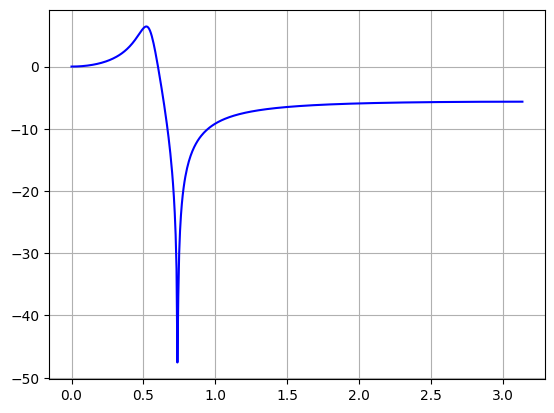

In [13]:
# seleciona em p3 os pólos mais próximos à circunferência de raio unitário, remove os pólos e zeros selecionados
p3 = pol[np.where(abs(pol) == max(abs(pol)))]
pol  = np.delete(pol, np.where(abs(pol) == max(abs(pol))))

# seleciona em z4 os zeros mais próximos a p4[0] e p4[1]
c = (np.sqrt((zer.real - p3[0].real)**2 + (zer.imag - p3[0].imag)**2)).argmin()
d = (np.sqrt((zer.real - p3[1].real)**2 + (zer.imag - p3[1].imag)**2)).argmin()

z3= np.array([zer[c], zer[d]])
zer  = np.delete(zer, [c, d])

b3t, a3 = signal.zpk2tf(z3,p3,1)

# Estimativa da energia da resposta ao impulso
#model = signal.dlti(b3t,a3)
#n, h = signal.dimpulse(model, n=50000)
#k3 = 1.0/np.linalg.norm(h,1)
k3 = sum(b3t)/sum(a3)
print(k3)

b3 = b3t/k3
#b3 = b3t
b3 = q * np.round(b3/q)
a3 = q * np.round(a3/q)

Omega, H = signal.freqz(b3,a3)
plt.plot(Omega,20*np.log10(abs(H)),'b')
plt.grid(which='both', axis='both')



4.836043984899215


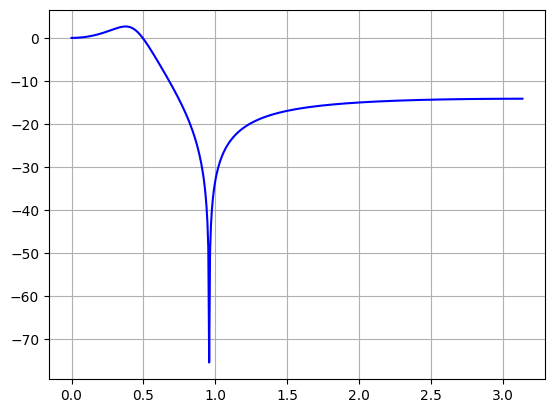

In [14]:
# seleciona em p2 os pólos mais próximos à circunferência de raio unitário, remove os pólos e zeros selecionados
p2 = pol[np.where(abs(pol) == max(abs(pol)))]
pol  = np.delete(pol, np.where(abs(pol) == max(abs(pol))))

# seleciona em z4 os zeros mais próximos a p4[0] e p4[1]
c = (np.sqrt((zer.real - p2[0].real)**2 + (zer.imag - p2[0].imag)**2)).argmin()
d = (np.sqrt((zer.real - p2[1].real)**2 + (zer.imag - p2[1].imag)**2)).argmin()

z2= np.array([zer[c], zer[d]])
zer  = np.delete(zer, [c, d])

b2t, a2 = signal.zpk2tf(z2,p2,1)

# Estimativa da energia da resposta ao impulso
#model = signal.dlti(b2t,a2)
#n, h = signal.dimpulse(model, n=50000)
#k2 = 1.0/np.linalg.norm(h,1)
k2 = sum(b2t)/sum(a2)
print(k2)

b2 = b2t/k2
#b2 = b2t
b2 = q * np.round(b2/q)
a2 = q * np.round(a2/q)

Omega, H = signal.freqz(b2,a2)
plt.plot(Omega,20*np.log10(abs(H)),'b')
plt.grid(which='both', axis='both')



35.272964655346506


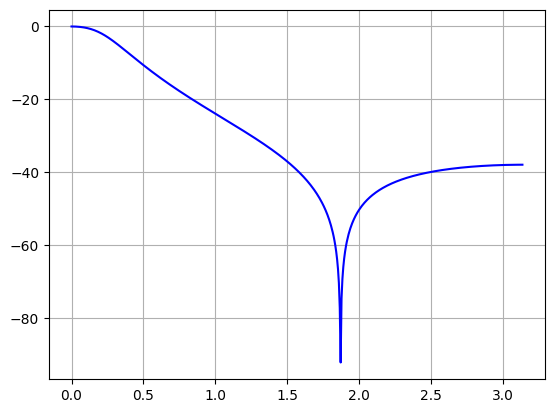

In [15]:
# seleciona em p1 os pólos mais próximos à circunferência de raio unitário, remove os pólos e zeros selecionados
p1 = pol[np.where(abs(pol) == max(abs(pol)))]
pol  = np.delete(pol, np.where(abs(pol) == max(abs(pol))))

# seleciona em z4 os zeros mais próximos a p4[0] e p4[1]
c = (np.sqrt((zer.real - p1[0].real)**2 + (zer.imag - p1[0].imag)**2)).argmin()
d = (np.sqrt((zer.real - p1[1].real)**2 + (zer.imag - p1[1].imag)**2)).argmin()

z1= np.array([zer[c], zer[d]])
zer  = np.delete(zer, [c, d])

b1t, a1 = signal.zpk2tf(z1,p1,1)

# Estimativa da energia da resposta ao impulso
#model = signal.dlti(b1t,a1)
#n, h = signal.dimpulse(model, n=50000)
#k1 = 1.0/np.linalg.norm(h,1)
k1 = sum(b1t)/sum(a1)
print(k1)

b1 = b1t/k1
#b1 = b1t
b1 = q * np.round(b1/q)
a1 = q * np.round(a1/q)

Omega, H = signal.freqz(b1,a1)
plt.plot(Omega,20*np.log10(abs(H)),'b')
plt.grid(which='both', axis='both')



(0.0, 3.141592653589793, -80.0, 20.0)

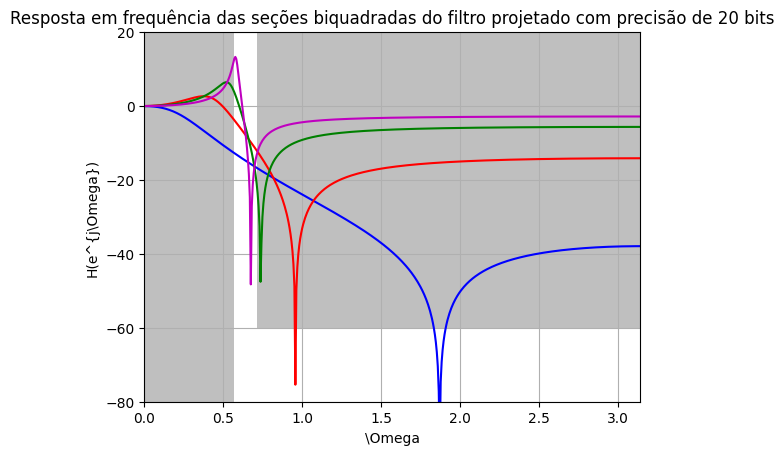

In [16]:
plt.title('Resposta em frequência das seções biquadradas do filtro projetado com precisão de ' + str(Nbits) + ' bits')
plt.xlabel('\Omega')
plt.ylabel('H(e^{j\Omega})')
plt.grid(which='both', axis='both')


Omega, H = signal.freqz(b1,a1)
plt.plot(Omega,20*np.log10(abs(H)),'b')
#Htotal = H

Omega, H = signal.freqz(b2,a2)
plt.plot(Omega,20*np.log10(abs(H)),'r')
#Htotal = Htotal*H

Omega, H = signal.freqz(b3,a3)
plt.plot(Omega,20*np.log10(abs(H)),'g')
#Htotal = Htotal*H

Omega, H = signal.freqz(b4,a4)
plt.plot(Omega,20*np.log10(abs(H)),'m')
#Htotal = Htotal*H


plt.fill([0, omegap,  omegap,  0], [-alphap, -alphap, -600, -600], '0.75', lw=0)
plt.fill([0, omegap,  omegap,  0], [alphap, alphap, 600, 600], '0.75', lw=0)
plt.fill([omegar, omegar, np.pi, np.pi], [99,  -alphar,  -alphar, 99], '0.75', lw=0)
plt.axis([0, np.pi, -80, 20])

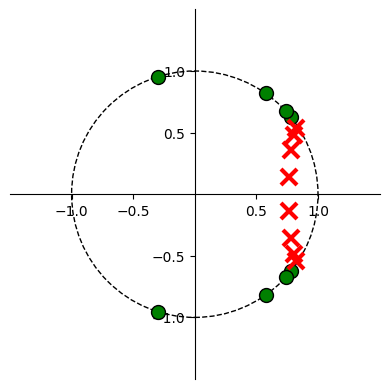

(array([-0.29568655+0.95528502j, -0.29568655-0.95528502j,
         0.5756427 +0.81770134j,  0.5756427 -0.81770134j,
         0.78042797+0.62524569j,  0.78042797-0.62524569j,
         0.74003988+0.67256299j,  0.74003988-0.67256299j]),
 array([0.82261407+0.53882345j, 0.82261407-0.53882345j,
        0.80432473+0.48366659j, 0.80432473-0.48366659j,
        0.78456669+0.35928566j, 0.78456669-0.35928566j,
        0.76647249+0.13759058j, 0.76647249-0.13759058j]),
 0.02913895174391394)

In [17]:
# Comparando a localização dos pólos do filtro no filtro com precisão infinita ...
zplane(b,a)


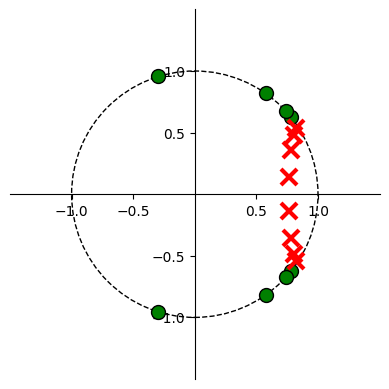

(array([-0.29525862+0.95541737j, -0.29525862-0.95541737j,
         0.5755608 +0.81775899j,  0.5755608 -0.81775899j,
         0.78044311+0.6252268j ,  0.78044311-0.6252268j ,
         0.74003264+0.67257095j,  0.74003264-0.67257095j]),
 array([0.82263184+0.53881154j, 0.82263184-0.53881154j,
        0.80432129+0.48365963j, 0.80432129-0.48365963j,
        0.7845459 +0.35932804j, 0.7845459 -0.35932804j,
        0.76647949+0.13767534j, 0.76647949-0.13767534j]),
 0.029138647949271356)

In [18]:
#... e no filtro implementado na forma em cascata quantizado
sos = np.array([np.concatenate([b1, a1]),
       np.concatenate([b2, a2]),
       np.concatenate([b3, a3]),
       np.concatenate([b4, a4]),
       ])

bcascata, acascata = signal.sos2tf(sos)
zplane(bcascata,acascata)

(0.0, 3.141592653589793, -80.0, 40.0)

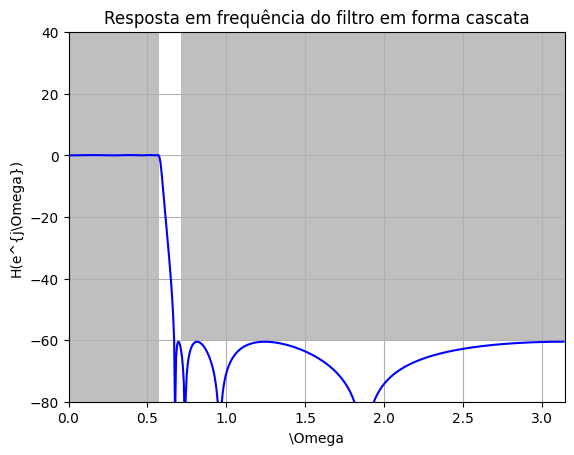

In [19]:
plt.title('Resposta em frequência do filtro em forma cascata')
plt.xlabel('\Omega')
plt.ylabel('H(e^{j\Omega})')
plt.grid(which='both', axis='both')


Omega, Htotal = signal.sosfreqz(sos)

plt.plot(Omega,20*np.log10(abs(Htotal)),'b')
plt.fill([0, omegap,  omegap,  0], [-alphap, -alphap, -600, -600], '0.75', lw=0)
plt.fill([0, omegap,  omegap,  0], [alphap, alphap, 600, 600], '0.75', lw=0)
plt.fill([omegar, omegar, np.pi, np.pi], [99,  -alphar,  -alphar, 99], '0.75', lw=0)
plt.axis([0, np.pi, -80, 40])


(0.0, 0.5699034292226381, -0.35000000000000003, 0.35000000000000003)

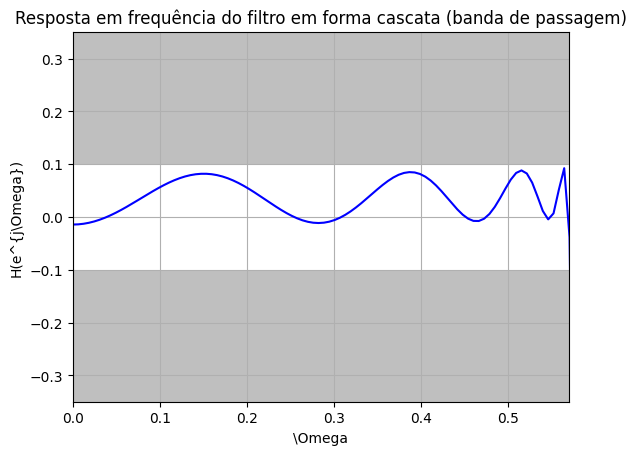

In [20]:
plt.title('Resposta em frequência do filtro em forma cascata (banda de passagem)')
plt.xlabel('\Omega')
plt.ylabel('H(e^{j\Omega})')
plt.grid('minor')

plt.plot(Omega,20*np.log10(abs(Htotal)),'b')
plt.fill([0, omegap,  omegap,  0], [-alphap, -alphap, -600, -600], '0.75', lw=0)
plt.fill([0, omegap,  omegap,  0], [alphap, alphap, 600, 600], '0.75', lw=0)
plt.fill([omegar, omegar, np.pi, np.pi], [99,  -alphar,  -alphar, 99], '0.75', lw=0)
plt.axis([0, 2.0*np.pi*fp/fs, -3.5*alphap, 3.5*alphap])

(0.641141357875468, 3.141592653589793, -66.0, -54.0)

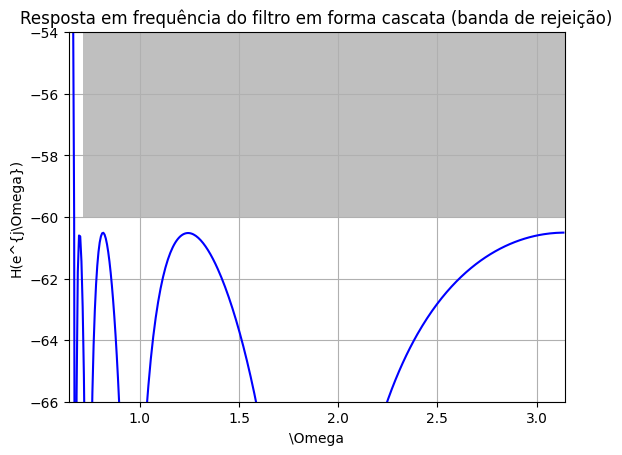

In [21]:
plt.title('Resposta em frequência do filtro em forma cascata (banda de rejeição)')
plt.xlabel('\Omega')
plt.ylabel('H(e^{j\Omega})')
plt.grid('minor')

plt.plot(Omega,20*np.log10(abs(Htotal)),'b')
plt.fill([0, omegap,  omegap,  0], [-alphap, -alphap, -600, -600], '0.75', lw=0)
plt.fill([0, omegap,  omegap,  0], [alphap, alphap, 600, 600], '0.75', lw=0)
plt.fill([omegar, omegar, np.pi, np.pi], [99,  -alphar,  -alphar, 99], '0.75', lw=0)
plt.axis([0.9*2*np.pi*fr/fs, np.pi, -1.1*alphar, -0.9*alphar])